In [1172]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import time
from IPython.display import clear_output
from gym.envs.registration import register

In [1173]:
np.set_printoptions(suppress=True)

In [1174]:
try:
    register(
        id="FrozenLakeNoSlip-v0",
        entry_point="gym.envs.toy_text:FrozenLakeEnv",
        kwargs={"map_name": "4x4", "is_slippery":False},
        max_episode_steps=100,
        reward_threshold=0.70 # optimum = 0.74
    )
except:
    pass

env_name = "FrozenLakeNoSlip-v0"
env = gym.make(env_name)
print("Observation space: ", env.observation_space)
print("Action space: ", env.action_space)
type(env.action_space)

Observation space:  Discrete(16)
Action space:  Discrete(4)


/Users/Mar/opt/anaconda3/lib/python3.9/site-packages/gym/envs/registration.py:216: UserWarning: WARN: Overriding environment FrozenLakeNoSlip-v0
  logger.warn("Overriding environment {}".format(id))


gym.spaces.discrete.Discrete

In [1175]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

In [1176]:
q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [1177]:
dict_action_val = {}
for i in range(16):
    for j in range(4):
        dict_action_val[(i, j)] = [];
        j += 1;
    i += 1;

In [1178]:
num_episodes = 7000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.95

exploration_rate = 1
max_exploration_rate = 1
min_exporation_rate = 0.01
exploration_decay_rate = 0.0005

In [1179]:
rewards_all_episodes = []
exploration_rates = []

#Q-learning algorithm
for episode in range(num_episodes):
    state = env.reset() #start state
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        #Exploration exploitation trade off
        exploration_rate_threshold = random.uniform(0,1) 
        if exploration_rate_threshold < exploration_rate:
            action = env.action_space.sample() #random action
        else:
            action = np.argmax(q_table[state, :]) #action that maximizes Q(s, a)
            
        #Take action and see new state, reward and if we have reached the goal state
        new_state, reward, done, info = env.step(action)
        
        #Update Q-table for Q(s,a)
        update = learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]) - \
                                                   q_table[state, action])
        q_table[state, action] += update
        
        #Data for plots
        if ((episode,q_table[state, action]) not in dict_action_val[(state, action)]):
            dict_action_val[(state, action)].append((episode,q_table[state, action]))
        
        #Update new state and rewards
        state = new_state
        rewards_current_episode += reward
        
        if done == True:
            break;
        
        #Visualization
        #print("Episode: {}, Total reward: {}, Eps: {}".format(episode, np.sum(rewards_all_episodes), exploration_rate))
        #print("s: ", state, "a: ", action)
        #env.render()#displays the graphics
        #print(q_table)
        #time.sleep(0.01)
        #clear_output(wait=True)
        
        
    #Exploration rate decay 
    exploration_rate = min_exporation_rate + \
    (max_exploration_rate - min_exporation_rate) * np.exp(-exploration_decay_rate*episode)
    
    rewards_all_episodes.append(rewards_current_episode)
    exploration_rates.append(exploration_rate)
    
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
rewards_per_5hundred_episodes = np.split(np.array(rewards_all_episodes),num_episodes/500)
rewards_per_hundred_episodes = np.split(np.array(rewards_all_episodes),num_episodes/100)

count = 1000
print("******Average rewards per thousand episodes******\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", np.around(np.sum(r/1000), 4))
    count += 1000
    
count_5hundred = 500
print("******Average rewards per 5hundred episodes******\n")
for r in rewards_per_5hundred_episodes:
    print(count_5hundred, ": ", np.around(np.sum(r/500), 4))
    count_5hundred += 500
    
count_hundred = 100
print("******Average rewards per hundred episodes******\n")
for r in rewards_per_hundred_episodes:
    print(count_hundred, ": ", np.around(np.sum(r/100), 4))
    count_hundred += 100

print("\n\n******Q-table******\n")
print(np.around(q_table, 4))

******Average rewards per thousand episodes******

1000 :  0.101
2000 :  0.439
3000 :  0.662
4000 :  0.799
5000 :  0.86
6000 :  0.919
7000 :  0.95
******Average rewards per 5hundred episodes******

500 :  0.044
1000 :  0.158
1500 :  0.362
2000 :  0.516
2500 :  0.62
3000 :  0.704
3500 :  0.764
4000 :  0.834
4500 :  0.862
5000 :  0.858
5500 :  0.92
6000 :  0.918
6500 :  0.946
7000 :  0.954
******Average rewards per hundred episodes******

100 :  0.04
200 :  0.04
300 :  0.01
400 :  0.07
500 :  0.06
600 :  0.12
700 :  0.13
800 :  0.18
900 :  0.11
1000 :  0.25
1100 :  0.25
1200 :  0.33
1300 :  0.36
1400 :  0.43
1500 :  0.44
1600 :  0.48
1700 :  0.45
1800 :  0.55
1900 :  0.59
2000 :  0.51
2100 :  0.47
2200 :  0.66
2300 :  0.61
2400 :  0.7
2500 :  0.66
2600 :  0.7
2700 :  0.71
2800 :  0.72
2900 :  0.65
3000 :  0.74
3100 :  0.73
3200 :  0.73
3300 :  0.75
3400 :  0.84
3500 :  0.77
3600 :  0.82
3700 :  0.79
3800 :  0.89
3900 :  0.78
4000 :  0.89
4100 :  0.82
4200 :  0.83
4300 :  0.88
4400 :  0.9

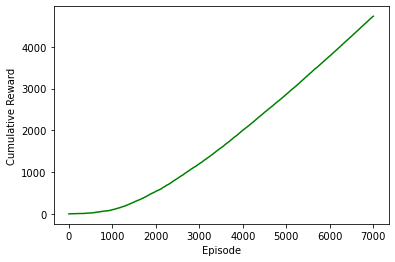

In [1180]:
total_rewards = np.cumsum(rewards_all_episodes)

x = np.linspace(1, 7000, 7000)

# plot
plt.plot(x, total_rewards[0:7000], color = 'g')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.show()

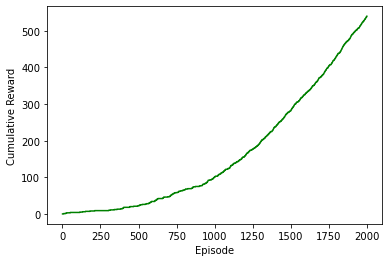

In [1181]:
total_rewards = np.cumsum(rewards_all_episodes)

x = np.linspace(1, 2000, 2000)

# plot
plt.plot(x, total_rewards[0:2000], color = 'g')
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.show()

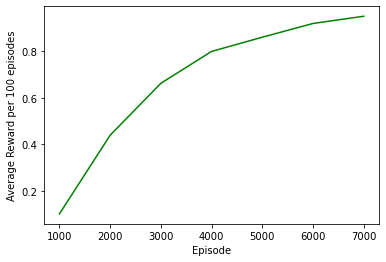

In [1182]:
ep = np.ones(len(rewards_per_thousand_episodes))
avg_thousand = np.empty(len(rewards_per_thousand_episodes))
for i in range(len(rewards_per_thousand_episodes)):
    ep[i] = (i+1)*1000

j = 0
for r in rewards_per_thousand_episodes:
    avg_thousand[j] = np.around(np.sum(r/1000), 4)
    j+=1;

# plot
plt.plot(ep, avg_thousand, color = 'g')
plt.xlabel("Episode")
plt.ylabel("Average Reward per 100 episodes")
plt.show()

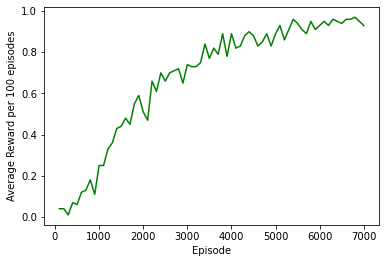

In [1183]:
ep = np.ones(len(rewards_per_hundred_episodes))
avg_hundred = np.empty(len(rewards_per_hundred_episodes))
for i in range(len(rewards_per_hundred_episodes)):
    ep[i] = (i+1)*100

j = 0
for r in rewards_per_hundred_episodes:
    avg_hundred[j] = np.around(np.sum(r/100), 4)
    j+=1;

# plot
plt.plot(ep, avg_hundred, color = 'g')
plt.xlabel("Episode")
plt.ylabel("Average Reward per 100 episodes")
plt.show()

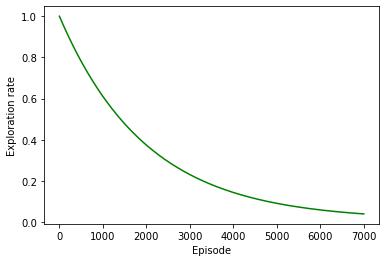

In [1184]:
ep = np.linspace(1, 7000, 7000)

# plot
plt.plot(ep, exploration_rates, color = 'g')
plt.xlabel("Episode")
plt.ylabel("Exploration rate")
plt.show()

In [1185]:
v_table = np.max(q_table, axis=1)
v_table = v_table.reshape((4,4))
print(np.around(v_table, 4))

[[0.7738 0.8145 0.8574 0.8126]
 [0.8145 0.     0.9025 0.    ]
 [0.8574 0.9025 0.95   0.    ]
 [0.     0.95   1.     0.    ]]


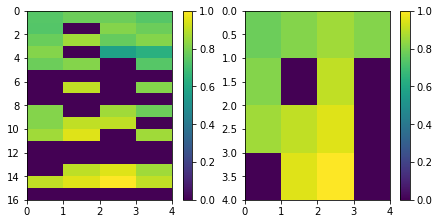

In [1186]:
data = [q_table, v_table]
fig, axs = plt.subplots(1, 2, figsize=(6, 3), constrained_layout=True)
for [data, ax, cmap] in zip(data, axs, [viridis, viridis]):
    ax.invert_yaxis()
    psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=0, vmax=1)
    fig.colorbar(psm, ax=ax)
plt.show()

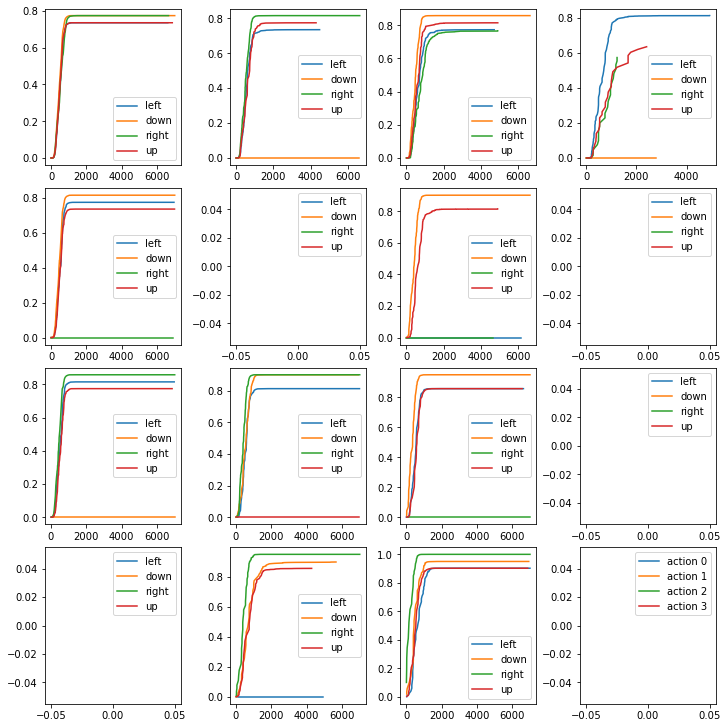

In [1187]:
fig, ax = plt.subplots(4, 4, figsize=(10, 10), constrained_layout=True)
for i in range(16):
    j = i % 4
    k = i // 4
    x0 = [x[0] for x in dict_action_val[(i,0)]]
    y0 = [y[1] for y in dict_action_val[(i,0)]]
    ax[k, j].plot(x0, y0, label = "action 0")

    x1 = [x[0] for x in dict_action_val[(i,1)]]
    y1 = [y[1] for y in dict_action_val[(i,1)]]
    ax[k, j].plot(x1, y1, label = "action 1")

    x2 = [x[0] for x in dict_action_val[(i,2)]]
    y2 = [y[1] for y in dict_action_val[(i,2)]]
    ax[k, j].plot(x2, y2, label = "action 2")

    x3 = [x[0] for x in dict_action_val[(i,3)]]
    y3 = [y[1] for y in dict_action_val[(i,3)]]
    ax[k, j].plot(x3, y3, label = "action 3")
    ax[k, j].legend(['left','down', 'right', 'up'])
plt.legend()
plt.show()

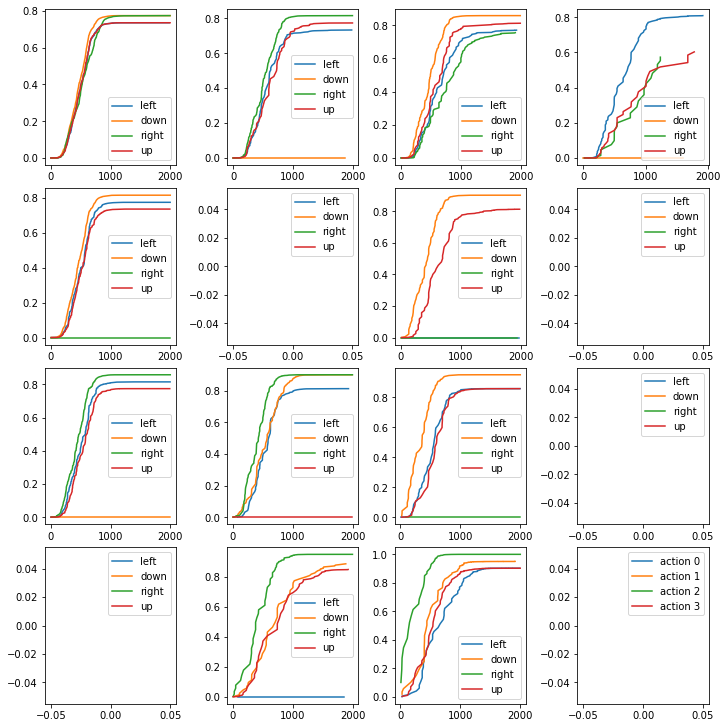

In [1188]:
fig, ax = plt.subplots(4, 4, figsize=(10, 10), constrained_layout=True)
for i in range(16):
    j = i % 4
    k = i // 4
    x0 = [x[0] for x in dict_action_val[(i,0)] if x[0] < 2000]
    y0 = [y[1] for y in dict_action_val[(i,0)]][0:len(x0)]
    ax[k, j].plot(x0, y0, label = "action 0")

    x1 = [x[0] for x in dict_action_val[(i,1)] if x[0] < 2000]
    y1 = [y[1] for y in dict_action_val[(i,1)]][0:len(x1)]
    ax[k, j].plot(x1, y1, label = "action 1")

    x2 = [x[0] for x in dict_action_val[(i,2)] if x[0] < 2000]
    y2 = [y[1] for y in dict_action_val[(i,2)]][0:len(x2)]
    ax[k, j].plot(x2, y2, label = "action 2")

    x3 = [x[0] for x in dict_action_val[(i,3)] if x[0] < 2000]
    y3 = [y[1] for y in dict_action_val[(i,3)]][0:len(x3)]
    ax[k, j].plot(x3, y3, label = "action 3")
    ax[k, j].legend(['left','down', 'right', 'up'])
plt.legend()
plt.show()